In [2]:
!unzip 1

Archive:  1
  inflating: user_log.csv            
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import findspark
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark

In [3]:
findspark.init()

In [4]:
from pyspark import SparkContext
sc = SparkContext()

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
     .appName("Project") \
     .getOrCreate()

In [6]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [11]:
df = spark.read.format("csv").option("header", "true").load("./user_log.csv") 

In [12]:
df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- cat_id: string (nullable = true)
 |-- merchant_id: string (nullable = true)
 |-- brand_id: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- action: string (nullable = true)
 |-- age_range: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- province: string (nullable = true)



In [13]:
# 1. item_id
item = []
for i in df.groupby("item_id").count().orderBy('count', ascending=False).take(10):
    item.append([i[0],i[1]])
item = pd.DataFrame(item, columns = ["item","count"])

Text(0, 0.5, 'Count')

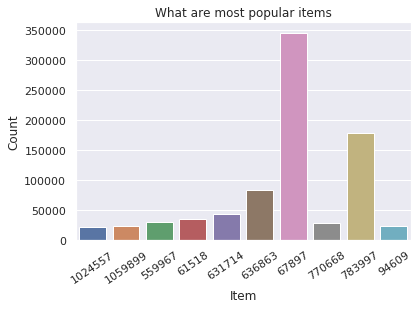

In [14]:
sns.set()
sns.barplot(x = item["item"], y = item["count"])
plt.xticks(rotation=34)
plt.title("What are most popular items")
plt.xlabel("Item")
plt.ylabel("Count")

In [15]:
# 2. cat_id
cat = []
for i in df.groupby("cat_id").count().orderBy('count', ascending=False).take(10):
    cat.append([i[0],i[1]])
cat = pd.DataFrame(cat, columns = ["category","count"])

Text(0, 0.5, 'Count')

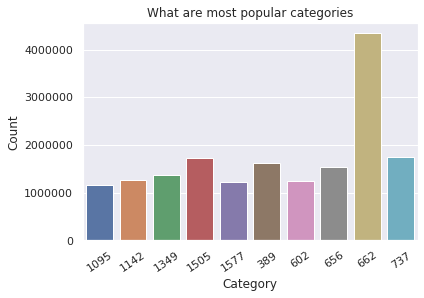

In [16]:
sns.set()

sns.barplot(x = cat["category"], y = cat["count"])
plt.xticks(rotation=34)
plt.title("What are most popular categories")
plt.xlabel("Category")
plt.ylabel("Count")

In [18]:
# 3. merchant_id
merchant = []
for i in df.groupby("merchant_id").count().orderBy('count', ascending=False).take(10):
    merchant.append([i[0],i[1]])
merchant = pd.DataFrame(merchant, columns = ["merchant","count"])

Text(0, 0.5, 'Count')

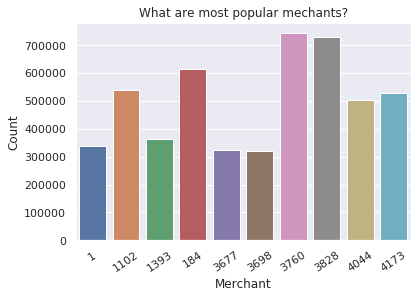

In [19]:
sns.set()
sns.barplot(x = merchant["merchant"], y = merchant["count"])
plt.xticks(rotation=34)
plt.title("What are most popular mechants?")
plt.xlabel("Merchant")
plt.ylabel("Count")

In [20]:
# 4. brand_id
brand = []
for i in df.groupby("merchant_id").count().orderBy('count', ascending=False).take(10):
    brand.append([i[0],i[1]])
brand = pd.DataFrame(brand, columns = ["brand","count"])

Text(0, 0.5, 'Count')

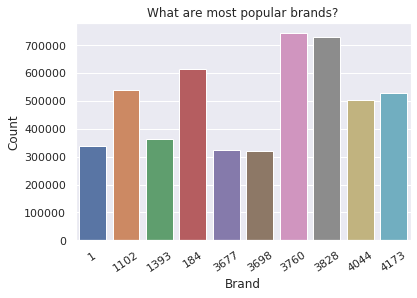

In [21]:
sns.set()
sns.barplot(x = brand.brand, y = brand["count"])
plt.xticks(rotation=34)
plt.title("What are most popular brands?")
plt.xlabel("Brand")
plt.ylabel("Count")

In [22]:
# 5. month
month = []
for i in df.groupby("month").count().orderBy('count', ascending=False).take(10):
    month.append([i[0],i[1]])
month = pd.DataFrame(month, columns = ["month","count"])

Text(0, 0.5, 'Count')

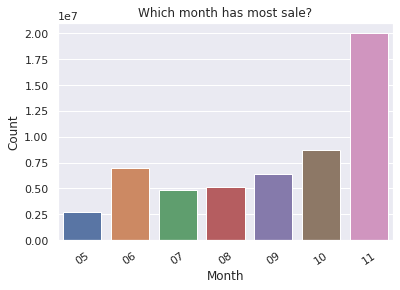

In [23]:
sns.barplot(x = month["month"], y = month["count"])
plt.xticks(rotation=34)
plt.title("Which month has most sale?")
plt.xlabel("Month")
plt.ylabel("Count",)

### Follow up -- What's going on in June and November

In [34]:
df.filter("month = '11'").groupby('day').count().orderBy('count', ascending=False).take(10)

[Row(day='11', count=10582633),
 Row(day='10', count=2940826),
 Row(day='09', count=1207273),
 Row(day='08', count=968099),
 Row(day='07', count=857846),
 Row(day='06', count=816861),
 Row(day='05', count=750696),
 Row(day='04', count=713245),
 Row(day='03', count=608543),
 Row(day='02', count=577250)]

In [36]:
df.filter("month = '06'").groupby('day').count().orderBy('count', ascending=False).take(10)

[Row(day='18', count=1395895),
 Row(day='17', count=339845),
 Row(day='27', count=326316),
 Row(day='28', count=295877),
 Row(day='25', count=268692),
 Row(day='24', count=220395),
 Row(day='19', count=203313),
 Row(day='04', count=202271),
 Row(day='06', count=200487),
 Row(day='20', count=199430)]

In [40]:
pd_11 = df.filter("month = '11'").groupby('day').count().orderBy('count', ascending=False).toPandas()

In [41]:
pd_6 = df.filter("month = '06'").groupby('day').count().orderBy('count', ascending=False).toPandas()

Text(0, 0.5, 'Count')

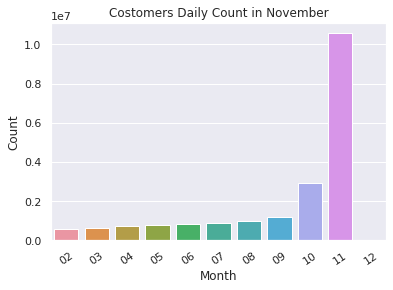

In [42]:
sns.barplot(x = pd_11["day"], y = pd_11["count"])
plt.xticks(rotation=34)
plt.title("Costomers Daily Count in November")
plt.xlabel("Month")
plt.ylabel("Count",)

Text(0, 0.5, 'Count')

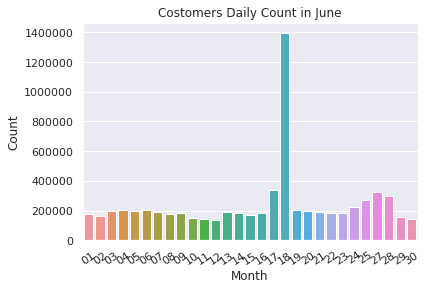

In [43]:
sns.barplot(x = pd_6["day"], y = pd_6["count"])
plt.xticks(rotation=34)
plt.title("Costomers Daily Count in June")
plt.xlabel("Month")
plt.ylabel("Count",)

In [24]:
action = []
for i in df.groupby("action").count().orderBy('count', ascending=False).take(10):
    action.append([i[0],i[1]])

In [25]:
action = pd.DataFrame(action, columns = ["action","count"])

Text(0, 0.5, 'Count')

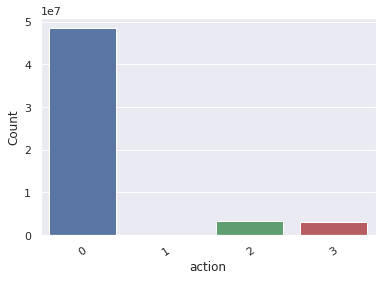

In [26]:
sns.barplot(x = action["action"], y = action["count"])
plt.xticks(rotation=34)

plt.xlabel("action")
plt.ylabel("Count")